In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math

In [50]:
colours = {0.01:'red',0.1:'purple',0.5:'darkviolet',1:'black',5:'blue',10:'cornflowerblue','inf':'skyblue','geo':'grey'}

it covers 99.29040524284376 % of the values
7.0959475715624e-05 compare with the last prob 6.778543241544144e-05
it covers 99.94793690833258 % of the values
5.206309166742029e-06 compare with the last prob 2.4979978105066747e-05
it covers 99.99999983719292 % of the values
1.628070789294611e-11 compare with the last prob 3.349963947497101e-10
it covers 99.99999999999976 % of the values
2.4424906541753444e-17 compare with the last prob 9.755654775956703e-16
it covers 100.0 % of the values
0.0 compare with the last prob 3.3891205435755526e-42
it covers 100.0 % of the values
0.0 compare with the last prob 2.6619580973154302e-58
it covers 100.0 % of the values
0.0 compare with the last prob 2.189379256792208e-118
it covers 99.99999999999976 % of the values
2.4424906541753444e-17 compare with the last prob 9.755654775956703e-16


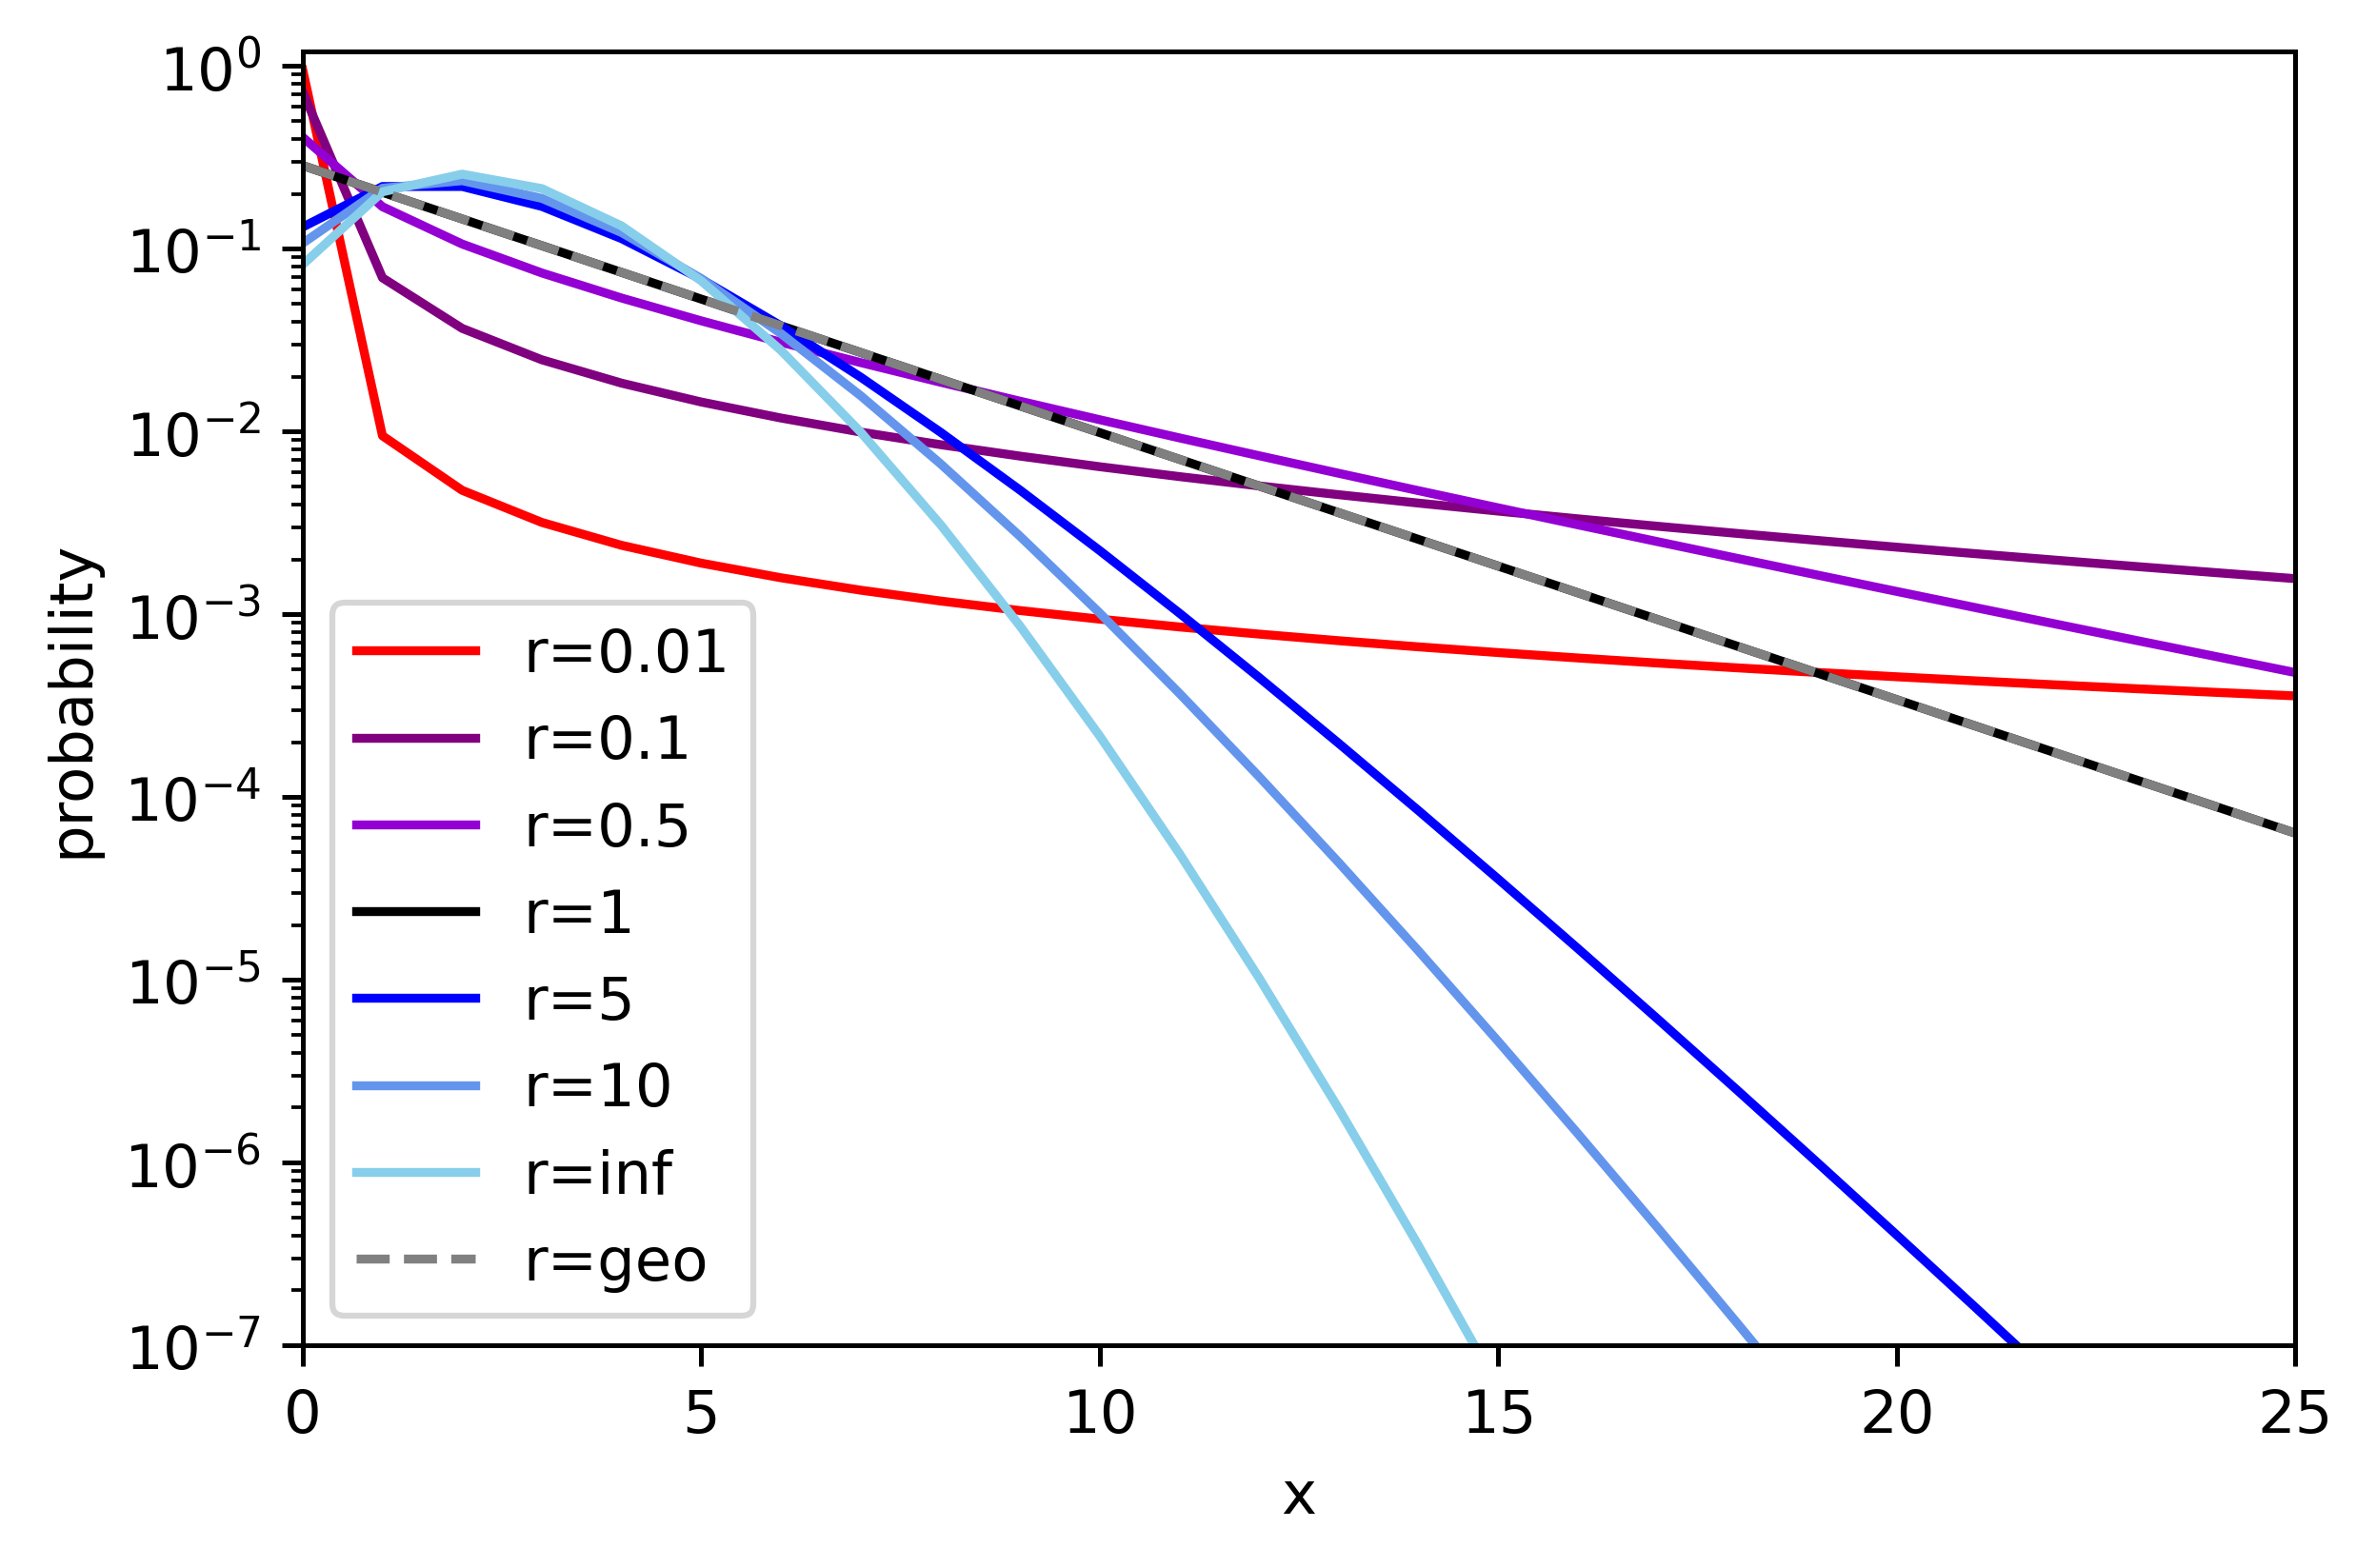

In [53]:
x_cutoff = 100
R0 = 2.5  ## the model input
plt.figure(dpi=450,figsize=(6,4))
for r,c in colours.items():
    weights = np.zeros(x_cutoff)
    if r == 'inf':
        for i in range(x_cutoff):
            temp1=SSA.poisson.pmf(i,R0)
            weights[i] = temp1
        weights_n = weights/np.sum(weights)
        plt.plot(range(100),weights_n,label=r'r={}'.format(r),color=c)
#     r = 50 ## parameters (in the paper of Lloyd smith is the k) 0.1 to start 
    elif r== 'geo':
        for i in range(x_cutoff):
            p = 1/(R0+1)
            temp1= p*np.power((1-p),i)
            weights[i] = temp1
        weights_n = weights/np.sum(weights)
        plt.plot(range(100),weights_n,label=r'r={}'.format(r),color=c,ls='--')
    else:
        p = r/(R0+r)
        for i in range(x_cutoff):
            temp1=SS.gamma(r+i)/SS.gamma(r)/SS.gamma((i+1))*np.power(p,r)*np.power((1-p),i)
            weights[i] = temp1
        weights_n = weights/np.sum(weights)
        plt.plot(range(100),weights_n,label=r'r={}'.format(r),color=c)
    print('it covers', np.sum(weights)*100,'% of the values') ## to generate the sample, the sum up probe should be 1
    ## we can assign/compare the rest of prob to each one
    prob_res = (1- np.sum(weights))/x_cutoff
    print (prob_res, 'compare with the last prob', weights[-1])
    ## normalise the weights to 1

plt.legend()
plt.yscale('log')
plt.ylim(0.0000001,1.2)
plt.xlim(0.,25)
plt.xlabel('x')
plt.ylabel('probability')
plt.show()